# TEXT EXTRACTRACTION FROM THE IMAGE

# Importing the **libraries**

In [81]:
import requests

In [82]:
language_code = input("Enter language code.....")
url = f"https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/{language_code}.traineddata"
r = requests.get(url, stream = True)
if r.status_code == 200:
  print("File downloaded successfully")
  with open(f"/usr/share/tesseract-ocr/4.00/tessdata/{language_code}.traineddata", "wb") as file:
    for block in r.iter_content(chunk_size=1024):
      if block:
        file.write(block)

else:
  print("Check your internent connections")


Enter language code.....eng
File downloaded successfully


# Downloading tesseract which is required by pytesseract library to run and save the file at the path in open() function

In [83]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev
from IPython.display import HTML, clear_output
clear_output()

# Installing pytesseract and open cv libraries

In [84]:
! apt install wand opencv-python
! pip install pytesseract
clear_output()

# Time to import the required libraries

In [85]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
import re
from pytesseract import Output

# Requesting and saving the image

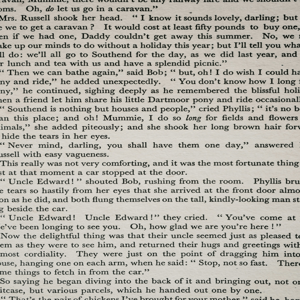

In [86]:
image = Image.open(requests.get('https://images.unsplash.com/photo-1528459199957-0ff28496a7f6?q=80&w=2686&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D', stream=True).raw)
image = image.resize((300, 300))
image.save('sample.png')
image

# Extracting text from image with custom configuration

In [87]:
custom_config = r'-l eng --oem 3 --psm 11'
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

ul

m on

ve

homm

m cten bad

U ien ihntimar utne ns

To Pn mt Tc vien ttity ment n h n

iemionbeerolenmiceber ie

nroneremnl e caimenes t mss tR e

ars

W enemamebran

wanane

foimiand Saman nekined

Ni roemit mant ol NTA t w t cndan

Mamoumate, m

Cmnienrirree

Ti

fain To t . meicares onal ue

mmorin

imen it hoi eiaemnies

Heledine

Fomanntion

pan‘

o

Momenne en op e 0e Piuines

s t ced lt on Ar ons c on oi

rarontil

Rom B UT ou mt hve hm on w

mornt

Arefremess

RERIB TT CR en antir e te m ts tig

h

ore

toentine

B

h

P Tim te e mowin

ts

ht

oek

ho

o n ie anke

Move

Xeoinnemnned

Nieimuigner

uxt

&

Y tss

Tt

d ces

*Waive um is

Afooleoelievd

Wlarlegued iros, Bine e Ceniie nih

Wrndermmnrialt

in nine ant

pcammmritaime}

on No en

mm

M ns uk hn

invnei ind aninietiond

Sonamat

iz

e

Te

fcia

(hite o Ee dity W m o n bng e mr

—

uo

mm

m h



# Removing unwanted symbols from the text, replacing with empty string

In [88]:
try:
  # text_2 = pytesseract.image_to_string(image, lang="eng")
  character_to_remove = "!@#$%^&*()[]-=+_|/?><,."
  new_string = text
  for character in character_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
  # print(text)
except Exception as e:
  print(f"The error {e} occured")

ul

m on

ve

homm

m cten bad

U ien ihntimar utne ns

To Pn mt Tc vien ttity ment n h n

iemionbeerolenmiceber ie

nroneremnl e caimenes t mss tR e

ars

W enemamebran

wanane

foimiand Saman nekined

Ni roemit mant ol NTA t w t cndan

Mamoumate m

Cmnienrirree

Ti

fain To t  meicares onal ue

mmorin

imen it hoi eiaemnies

Heledine

Fomanntion

pan‘

o

Momenne en op e 0e Piuines

s t ced lt on Ar ons c on oi

rarontil

Rom B UT ou mt hve hm on w

mornt

Arefremess

RERIB TT CR en antir e te m ts tig

h

ore

toentine

B

h

P Tim te e mowin

ts

ht

oek

ho

o n ie anke

Move

Xeoinnemnned

Nieimuigner

uxt



Y tss

Tt

d ces

Waive um is

Afooleoelievd

Wlarlegued iros Bine e Ceniie nih

Wrndermmnrialt

in nine ant

pcammmritaime}

on No en

mm

M ns uk hn

invnei ind aninietiond

Sonamat

iz

e

Te

fcia

hite o Ee dity W m o n bng e mr

—

uo

mm

m h



# Now using open cv to get the text from complex images

array([[[172, 183, 190],
        [177, 186, 193],
        [130, 136, 136],
        ...,
        [172, 182, 185],
        [169, 179, 185],
        [160, 171, 177]],

       [[161, 171, 175],
        [163, 174, 180],
        [ 41,  47,  44],
        ...,
        [174, 185, 191],
        [174, 184, 190],
        [167, 176, 180]],

       [[160, 169, 173],
        [175, 186, 193],
        [139, 149, 154],
        ...,
        [172, 182, 189],
        [172, 182, 188],
        [171, 181, 188]],

       ...,

       [[191, 199, 201],
        [ 71,  77,  71],
        [150, 156, 154],
        ...,
        [181, 190, 193],
        [179, 188, 191],
        [178, 187, 192]],

       [[193, 202, 205],
        [116, 125, 123],
        [142, 151, 149],
        ...,
        [181, 191, 193],
        [179, 188, 191],
        [178, 187, 191]],

       [[194, 203, 206],
        [198, 207, 210],
        [199, 208, 211],
        ...,
        [101, 106, 102],
        [ 81,  86,  83],
        [132, 138, 137]]], dtype=uint8)
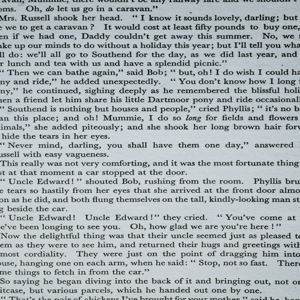

In [92]:
image = cv2.imread('sample.png')

# Converting image in greyscale for easy processing

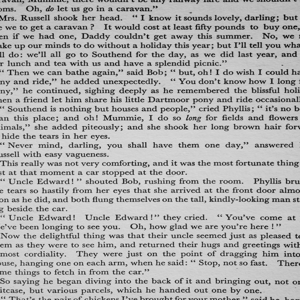

In [93]:
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = get_grayscale(image)
Image.fromarray(gray)

# Romeving blur from image (Removing noise)

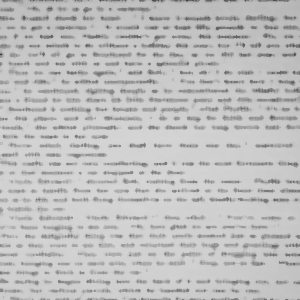

In [96]:
def remove_noise(image):
  return cv2.medianBlur(image, 5)
noise = remove_noise(gray)
Image.fromarray(noise)

# Threshoulding the image

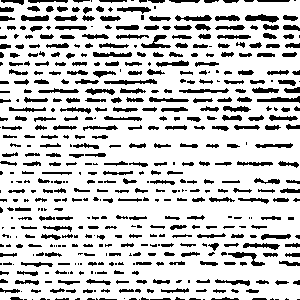

In [97]:
def thresholding(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(noise)
Image.fromarray(thresh)

# Performing the erosion on the image

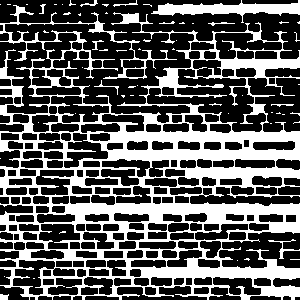

In [98]:
def erode(image):
  kernel = np.ones((5,5), np.uint8)
  return cv2.erode(image, kernel, iterations = 1)
erode = erode(thresh)
Image.fromarray(erode)

# Perfoming morphological trandformation

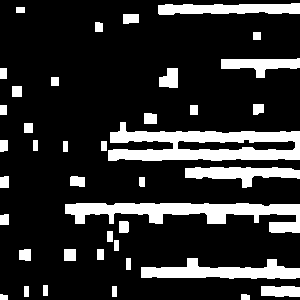

In [99]:
def opening(image):
  kernel = np.ones((5,5), np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(erode)
Image.fromarray(opening)

## Canny transformation

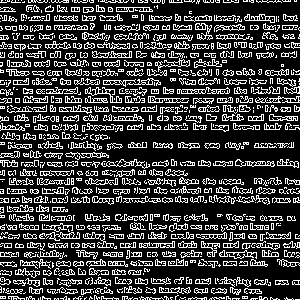

In [104]:
def canny(image):
  return cv2.Canny(image, 100, 200)
canny = canny(gray)
Image.fromarray(canny)

# Skew correction

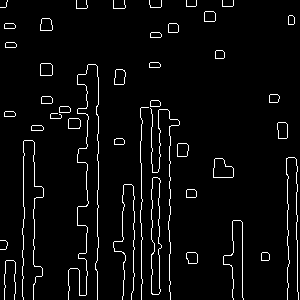

In [103]:
def deskew(image):
    # Find coordinates of non-zero pixels
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # Adjust the angle for proper deskewing
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Determine the center of the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Get the rotation matrix and rotate the image
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

# Apply the deskew function
rotated = deskew(canny)

# Display the deskewed image
Image.fromarray(rotated)